In [ ]:
%matplotlib inline
import pymc as pm
import numpy as np
import pandas as pd
from scipy import stats
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import arviz as az

%config InlineBackend.figure_format = 'retina'
#plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

#### Code 4.1

In [ ]:
pos = np.random.uniform(-1, 1, size=(16, 1000)).sum(0)
az.plot_kde(pos);
plt.xlabel('position', fontsize=14)
plt.ylabel('Density', fontsize=14);


#### Figure 4.2

In [ ]:
# Parameters
num_walkers = 1000  # Number of walkers
num_steps = 17     # Number of steps in each walk
steps_to_plot = [4, 8, 16]

# Generate random walks
#np.random.seed(42)  # For reproducibility
steps = np.random.choice([-1, 1], size=(num_walkers, num_steps))  # -1 for left, 1 for right
positions = np.cumsum(steps, axis=1)  # Cumulative sum to get positions at each step


# Create the top plot (random walk traces)
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
random_walker_index = np.random.randint(0, positions.shape[0])

# Plot all walkers
for i, walker in enumerate(positions):
    if i == random_walker_index:
        plt.plot(walker, color="red", alpha=1.0, label=f"Walker #{random_walker_index}")  # Highlighted walker
    else:
        plt.plot(walker, color="blue", alpha=0.01)  # Regular walkers
#plt.plot(positions.mean(axis=0), color="black", linewidth=2, label="Mean trajectory")  # Mean trajectory
for i in steps_to_plot:
    plt.axvline(i, color="black", linestyle="--", alpha=0.7)  # Vertical reference line for step 4

plt.title("Random Walks", fontsize=16)
plt.xlabel("Step number", fontsize=14)
plt.ylabel("Position", fontsize=14)
plt.legend()
# Create the bottom plots (position distributions at selected steps)

for i, step in enumerate(steps_to_plot):
    plt.subplot(2, len(steps_to_plot) ,len(steps_to_plot) + i + 1)
    step_positions = positions[:, step - 1]
    
    # Extend data with zeros at the edges for smoother drop to zero
    extended_positions = np.concatenate([[-6], step_positions, [6]])

    # Plot KDE with extended data
    az.plot_kde(extended_positions, bw=1, label="KDE")

    if step == steps_to_plot[-1]:
        mean, std = step_positions.mean(), step_positions.std()
        x = np.linspace(-10, 10, 100)
        plt.plot(x, stats.norm.pdf(x, loc=mean, scale=std), color="black", label="Normal approximation")
    
    
    # Title and axis labels
    plt.title(f"{step} steps", fontsize=14)
    plt.xlabel("Position", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.xlim(-10,10)
    plt.ylim([0, None])  # Ensure the y-axis starts at 0
    plt.legend(loc = 'lower center', fontsize= 6)

plt.tight_layout()
plt.show()

#### Code 4.2

In [ ]:
np.random.uniform(1, 1.1, size=(12, 10000)).prod(0)

#### Code 4.3

In [ ]:
growth= np.random.uniform(1, 1.1, size=(12, 10000)).prod(0)
az.plot_kde(growth);

#### Code 4.4

In [ ]:
big = np.random.uniform(1, 1.5, size=(12, 10000)).prod(0)
small = np.random.uniform(1, 1.01, size=(12, 10000)).prod(0)


_, ax = plt.subplots(1,2, figsize=(8,4))
az.plot_kde(small, ax=ax[0]);
ax[0].set_title('Small Interactions (Gaussain)');
az.plot_kde(big, ax=ax[1]);
ax[1].set_title('Big Interactions (not Gaussain)');



#### Code 4.5

In [ ]:
log_big = np.log(np.random.uniform(1, 1.5, size=(12, 10000)).prod(0))
az.plot_kde(log_big);
plt.title('Big Interactions (now Gaussian)');

#### Code 4.6

In [ ]:
w, n = 6, 9
p_grid = np.linspace(0, 1, 100)
prior = stats.uniform.pdf(p_grid, 0, 1)
likelihood = stats.binom.pmf(k=w, n=n, p=p_grid) 
numerator = prior * likelihood
denominator = (prior * likelihood).sum()
posterior = numerator / denominator
plt.plot(p_grid, posterior)
plt.xlabel('p', fontsize=14)
plt.ylabel('Density', fontsize=14);

#### Code 4.7

In [ ]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)

#### Code 4.8

In [ ]:
display(d.head())

#### Code 4.9

In [ ]:
# The default pandas "precis" is d.describe() but I've made a precis function here:

def precis(df):
    summary = pd.DataFrame()
    summary['mean'] = round(df.mean(), 2)
    summary['sd'] = round(df.std(), 2)
    summary['5.5%'] = round(df.quantile(0.055), 2)
    summary['94.5%'] = round(df.quantile(0.945), 2)

    display(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}', summary)

precis(d)

#### Code 4.10

In [ ]:
display(d.height.head())

#### Code 4.11

In [ ]:
d2 = d[d.age >= 18]

precis(d2)

az.plot_kde(d2.height);

#### Code 4.12

In [ ]:
x = np.linspace(100, 250, 100)
plt.plot(x, stats.norm.pdf(x, 178, 20));

#### Code 4.13

In [ ]:
x = np.linspace(-10, 60, 100)
plt.plot(x, stats.uniform.pdf(x, 0, 50));

#### Code 4.14

In [ ]:
n_samples = 1000
sample_mu = stats.norm.rvs(loc=178, scale=20, size=n_samples)
sample_sigma = stats.uniform.rvs(loc=0, scale=50, size=n_samples)
prior_h = stats.norm.rvs(loc=sample_mu, scale=sample_sigma)


az.plot_kde(prior_h,plot_kwargs={"color": "blue", "linewidth": 2}, label = 'Prior w/ scale: 50')

plt.xlabel('heights', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.xlim(0,400)
plt.legend(fontsize = 8, loc = 'upper left');

#### Code 4.15

In [ ]:
n_samples = 1000
sample_mu = stats.norm.rvs(loc=178, scale=20, size=n_samples)
sample_sigma = stats.uniform.rvs(loc=0, scale=50, size=n_samples)
prior_h = stats.norm.rvs(loc=sample_mu, scale=sample_sigma)

sample_mu_wide = stats.norm.rvs(loc=178, scale=100, size=n_samples)
sample_sigma_wide = stats.uniform.rvs(loc=0, scale=50, size=n_samples)
prior_h_wide = stats.norm.rvs(loc=sample_mu_wide, scale=sample_sigma_wide)


az.plot_kde(prior_h,plot_kwargs={"color": "blue", "linewidth": 2}, label = 'Prior w/ scale: 50')
az.plot_kde(prior_h_wide, plot_kwargs={"color": "red", "linewidth": 2}, label = 'Prior w/ scale: 100')

plt.xlabel('heights', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.xlim(0,400)
plt.legend(fontsize = 8, loc = 'upper left');

#### Code 4.16

In [ ]:
# Step 1: Create the p_gird (we'll call it p_matrix since it has 2 dimensions now)
p_matrix = np.mgrid[150:160:0.1, 7:9:0.1].reshape(2, -1).T

# Step 2: Compute log-likelihood for each combination
likelihood = [
    sum(stats.norm.logpdf(d2.height, loc=p_matrix[:, 0][i], scale=p_matrix[:, 1][i]))
    for i in range(len(p_matrix))
]

# Step 3: Add priors (we'll call it unstable_numerator because there's some numerical tricks we have to perform on small numbers to avoid NaN values)
unstable_numerator = (
    likelihood
    + stats.norm.logpdf(p_matrix[:, 0], loc=178, scale=20)  # Prior for mu
    + stats.uniform.logpdf(p_matrix[:, 1], loc=0, scale=50)  # Prior for sigma
)

# Step 4: Convert log-probabilities to probabilities
numerator = np.exp(unstable_numerator - max(unstable_numerator))

denominator = sum(numerator)

posterior = numerator / denominator



#### Code 4.17

In [ ]:

xi = np.linspace(p_matrix[:,0].min(), p_matrix[:,0].max(), 100)
yi = np.linspace(p_matrix[:,1].min(), p_matrix[:,1].max(), 100)
zi = griddata((p_matrix[:,0], p_matrix[:,1]), unstable_numerator, (xi[None,:], yi[:,None]))

plt.contour(xi, yi, zi);

#### Code 4.18

In [ ]:
sample_rows = np.random.choice(np.arange(len(p_matrix)), size=int(1e4), replace=True, 
                               p=(posterior))
                               
sample_mu = p_matrix[:,0][sample_rows]
sample_sigma = p_matrix[:,1][sample_rows]

plt.plot(sample_mu, sample_sigma, 'o', alpha=0.05)
plt.axis('equal')
plt.grid(False)
plt.xlabel('sample_mu', fontsize=14);
plt.ylabel('sample_sigma', fontsize=14);


#### Code 4.19

In [ ]:
sample_rows = np.random.choice(np.arange(len(p_matrix)), size=int(1e4), replace=True, 
                               p=(posterior))
                               
sample_mu = p_matrix[:,0][sample_rows]
sample_sigma = p_matrix[:,1][sample_rows]

### Code 4.20

In [ ]:
plt.plot(sample_mu, sample_sigma, 'o',alpha = .05)

### Code 4.21

In [ ]:
_, ax = plt.subplots(1,2, figsize=(8,4))
az.plot_kde(sample_mu, bw = .1,ax=ax[0])
ax[0].set_xlabel('sample_mu', fontsize=14)
ax[0].set_yticks([])
az.plot_kde(sample_sigma, bw = .1, ax=ax[1])
ax[1].set_xlabel('sample_sigma', fontsize=14)
ax[1].set_yticks([]);

#### Code 4.22

In [ ]:
az.hdi(sample_mu, hdi_prob = .89), az.hdi(sample_sigma, hdi_prob = .89)

#### Code 4.23

In [ ]:
d3 = np.random.choice(d2.height, 20)

print(d3)

### Code 4.24

In [ ]:
post2 = np.mgrid[150:170:0.1, 4:20:0.1].reshape(2,-1).T

likelihood2 = [sum(stats.norm.logpdf(d3, loc=post2[:,0][i], scale=post2[:,1][i])) for i in range(len(post2))]

unstable_numerator2 = (likelihood2 + 
              stats.norm.logpdf(post2[:,0], loc=178, scale=20) + 
              stats.uniform.logpdf(post2[:,1], loc=0, scale=50))

numerator2 = np.exp(unstable_numerator2 - max(unstable_numerator2))

denominator2 = numerator2.sum()

posterior = numerator2 / denominator2

sample_rows2 = np.random.choice(np.arange(len(post2)), size=10000, replace=True, 
                               p=(posterior))
sample_mu2 = post2[:,0][sample_rows2]
sample_sigma2 = post2[:,1][sample_rows2]

In [ ]:
plt.plot(sample_mu2, sample_sigma2, 'o', alpha=0.05)
plt.axis('equal')
plt.xlabel('sample_mu2', fontsize=14)
plt.ylabel('sample_sigma2', fontsize=14)
plt.grid(False)

#### Code 4.25

In [ ]:
az.plot_kde(sample_sigma2, bw = .1)
plt.xlabel('sample_sigma2', fontsize=14)
plt.yticks([]);

#### Code 4.26

In [ ]:
#This is just resetting the variables back to the original dataset

d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d2 = d[d.age >= 18]

# with pm.Model() as normal_approximation:
#     p = pm.Uniform('p', 0, 1)
#     w = pm.Binomial('w', n=len(d2), p=p, observed=d2.sum())
#     mean_q = pm.find_MAP()
#     std_q = ((1/pm.find_hessian(mean_q, vars=[p]))**0.5)[0]
# mean_q['p'], std_q

#### Code 4.27-8

We could use a quadratic approximation like McElreath does in his book and we did in code 2.6. But Using PyMC3 is really simple to just sample from the model using a "sampler method". Most common sampler methods are members of the Markov Chain Monte Carlo Method (MCMC) family (for details read Section 2.4.3 and Chapter 8 of Statistical Rethinking).

PyMC3 comes with various sampler. Some sampler are more suited than others for certain type of variable (and/or problems). For now we are going to let PyMC3 choose the sampler for us. PyMC3 also tries to provide a reasonable starting point for the simulation. By default PyMC3 uses the same adaptive procedure as in STAN `'jitter+adapt_diag'`, which start with a identity mass matrix and then adapt a diagonal based on the variance of the tuning samples. 

You can read more details of PyMC3 [here](http://pymc-devs.github.io/pymc3/notebooks/getting_started.html)

In [ ]:
with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sigma=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sigma=sigma, observed=d2.height)

    trace_4_1 = pm.sample(1000, tune=1000)

#### Code 4.29

In [ ]:
pm.summary(trace_4_1, hdi_prob= .89).round(2)

#### Code 4.28

In [ ]:
with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sigma=20, testval=d2.height.mean())
    sigma = pm.Uniform('sigma', lower=0, upper=50, testval=d2.height.std())
    height = pm.Normal('height', mu=mu, sigma=sigma, observed=d2.height)
    trace_4_1 = pm.sample(1000, tune=1000)

In [ ]:
pm.summary(trace_4_1, hdi_prob = .89).round(2)

#### Code 4.29

In [ ]:
with pm.Model() as m4_2:
    mu = pm.Normal('mu', mu=178, sigma=0.1)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sigma=sigma, observed=d2.height)
    trace_4_2 = pm.sample(1000, tune=1000)

In [ ]:
pm.summary(trace_4_2, hdi_prob = .89).round(2)

#### Code 4.30

For some computations could be nice to have the trace turned into a DataFrame, this can be done using the "trace_to_dataframe" function

In [ ]:
trace_df = trace_4_1.posterior.to_dataframe().reset_index()


#### Code 4.31

In [ ]:
cov = trace_df[['mu', 'sigma']].cov()

cov

#### Code 4.32

We did not use the quadratic approximation, instead we use a MCMC method to sample from the posterior. Thus, we already have samples. We can do something like

In [ ]:
trace_df[['mu', 'sigma']].head(10)

Or directly from the trace (we are getting the first ten samples)

In [ ]:
samples_10 = trace_4_1.posterior[['mu','sigma']].sel(chain=0).sel(draw = slice(0,10))


#### Code 4.33

In our case, this is the same we did in the code 4.27

In [ ]:
az.summary(trace_4_1, hdi_prob=.89).round(2)

#### Code 4.34

In [ ]:
mean = np.array(trace_df[['mu','sigma']].mean())

post = stats.multivariate_normal.rvs(mean=mean, cov=cov, size=10)

print(f'Mean for [mu, sigma]:\n{mean}\n\
Covariance Matrix:\n{cov}\n\
10 Random [mu, sigma]:\n{post} ')

#### Code 4.35

In [ ]:
precis_post = precis(pd.DataFrame(post))

display(precis_post)

#### Overthinking: Under the hood with multivariate sampling

Instead of sampling from a normal and then exponentiating to ensure sigma is positive, we can use the lognormal distribution for the same result. The Lognormal distribution is parametrized in terms of $\tau$ (tau) the precision and not the standard deviation, where: 

$$tau=\frac{1}{sd^2}$$

The normal distribution can also be parametrized in terms of the precision (tau). Given that the conversion between both parametrization is done right, which one to use is only a matter of convenience. 

In [ ]:
with pm.Model() as m4_1_logsigma:
    mu = pm.Normal('mu', mu=178, sigma=20)
    sigma = pm.Lognormal('sigma', mu=2, tau=0.01)
    height = pm.Normal('height', mu=mu, sigma=sigma, observed=d2.height)
    trace_4_1_logsigma = pm.sample(1000, tune=1000)

In [ ]:
az.plot_trace(trace_4_1_logsigma);

#### Code 4.37

In [ ]:
plt.plot(d2.weight, d2.height,'o');

#### Code 4.38

PYMC has a cool feature for prior_predictive checks called pm.sample_prior_predictive() that generates all the data you'd need for the checks.  Just define your ranges for alpha and beta, and call it with as many samples as you'd like (in the below example, 1000)

In [1697]:
with pm.Model() as prior_check:
    alpha = pm.Normal('alpha', mu=178, sigma=20)
    beta = pm.Normal('beta', mu=0, sigma=10)
    prior_predictive_check = pm.sample_prior_predictive(1000)

Sampling: [alpha, beta]


#### Code 4.39

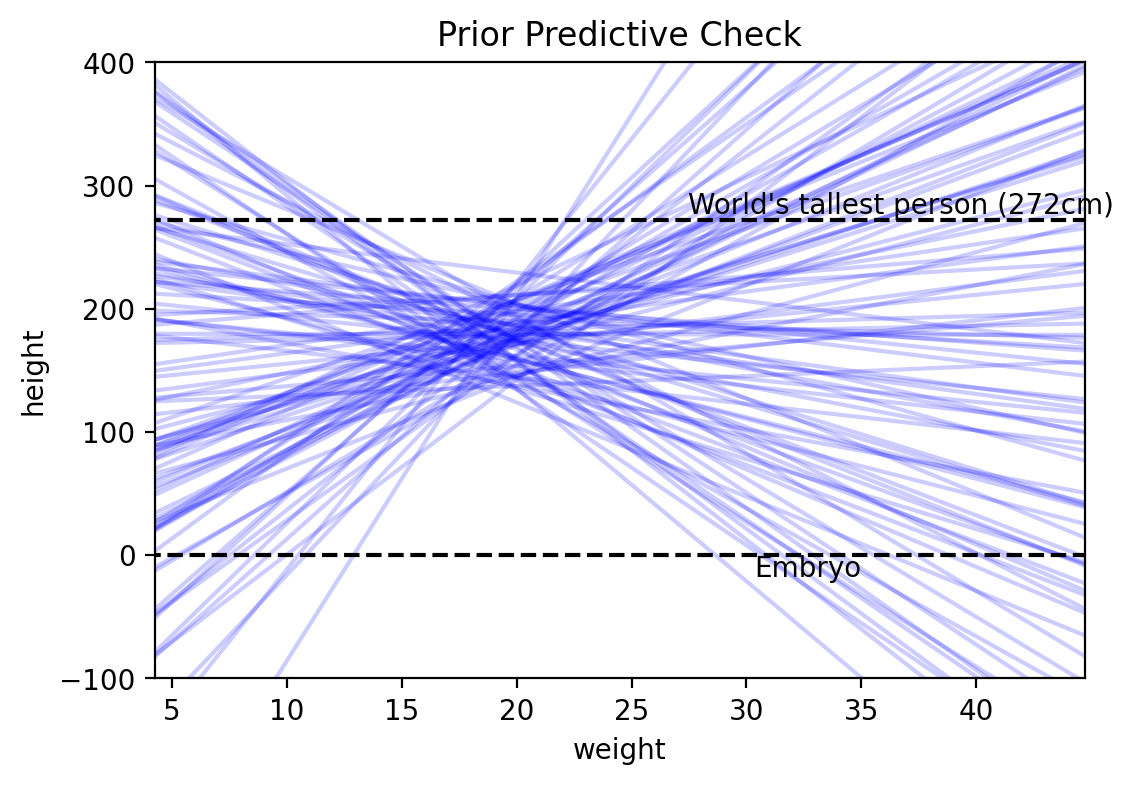

In [1698]:
prior_df = prior_predictive_check.prior.to_dataframe().reset_index()
x_obs = d2.weight  # Observed predictor variable
x_mean = x_obs.mean()
x_range = np.linspace(x_obs.min(), x_obs.max(), 100)

# Iterate over a subset of prior samples
plt.figure(figsize=(6, 4))
for _, column in prior_df.sample(100).iterrows():  # Use a subset for clarity
    # Compute y-values for the prior predictive line
    y = column['alpha'] + column['beta'] * (x_range - x_mean)
    plt.plot(x_range, y, color='blue', alpha=0.2)

# Add plot formatting
plt.title("Prior Predictive Check")
plt.xlabel("weight")
plt.ylabel("height")
plt.vlines
plt.hlines(272, 0, 100, linestyles='dashed', color = 'black', label = 'World\'s tallest person (272cm)')

plt.text(46, 272, "World's tallest person (272cm)", color='black', 
         ha='right', va='bottom', fontsize=10)
plt.hlines(0, 0, 100, linestyles='dashed', color = 'black', label = 'Embryo')
plt.text(35, 0, 'Embryo', color='black', 
         ha='right', va='top', fontsize=10)
plt.xlim(x_obs.min(), x_obs.max())
plt.ylim(-100, 400)
plt.show()

#### Code 4.4

In [1710]:
with pm.Model() as log_prior_check:
    beta = pm.LogNormal('beta', mu=0, sigma=1)
    log_beta = pm.sample_prior_predictive(1000)

log_beta_df = log_beta.to_dataframe().reset_index()

log_beta_df['beta'].head(10)

Sampling: [beta]


0    0.298753
1    1.017619
2    3.568749
3    0.236715
4    0.597526
5    0.744242
6    0.483430
7    0.739753
8    0.148545
9    0.480405
Name: beta, dtype: float64

#### Code 4.1

Sampling: [alpha, beta]


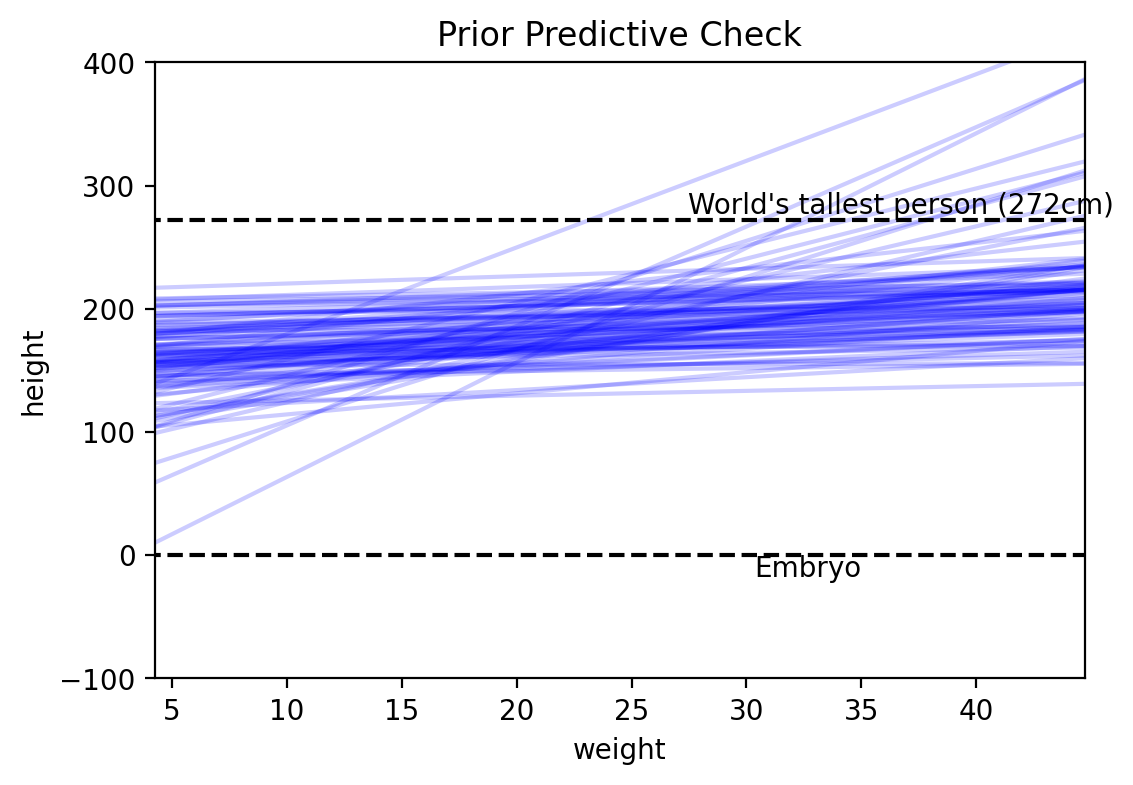

In [1711]:
with pm.Model() as log_prior_check:
    alpha = pm.Normal('alpha', mu=178, sigma=20)
    beta = pm.LogNormal('beta', mu=0, sigma=1)
    log_prior_predictive_check = pm.sample_prior_predictive(1000)

log_prior_df = log_prior_predictive_check.to_dataframe().reset_index()

x_obs = d2.weight  # Observed predictor variable
x_mean = x_obs.mean()
x_range = np.linspace(x_obs.min(), x_obs.max(), 100)

# Iterate over a subset of prior samples
plt.figure(figsize=(6, 4))
for _, column in log_prior_df.sample(100).iterrows():  # Use a subset for clarity
    # Compute y-values for the prior predictive line
    y = column['alpha'] + column['beta'] * (x_range - x_mean)
    plt.plot(x_range, y, color='blue', alpha=0.2)

# Add plot formatting
plt.title("Prior Predictive Check")
plt.xlabel("weight")
plt.ylabel("height")
plt.vlines
plt.hlines(272, 0, 100, linestyles='dashed', color = 'black', label = 'World\'s tallest person (272cm)')

plt.text(46, 272, "World's tallest person (272cm)", color='black', 
         ha='right', va='bottom', fontsize=10)
plt.hlines(0, 0, 100, linestyles='dashed', color = 'black', label = 'Embryo')
plt.text(35, 0, 'Embryo', color='black', 
         ha='right', va='top', fontsize=10)
plt.xlim(x_obs.min(), x_obs.max())
plt.ylim(-100, 400)
plt.show()

#### Code 4.42

In [ ]:
# Reset our variables
d = pd.read_csv('Data/Howell1.csv', sep=';')
d2 = d[d.age >= 18]

weight = d2.weight
xbar = d2.weight.mean()


with pm.Model() as m4_3:
    sigma = pm.Uniform('sigma', 0,50)
    a = pm.Normal('a', mu = 178, sigma = 20)
    b = pm.LogNormal('b', mu = 0, sigma = 1)
    mu = pm.Deterministic('mu', a + b * (weight - xbar))

    height = pm.Normal('height', mu = mu, sigma = sigma, observed=d2.height)

    m4_3_trace = pm.sample(1000)
    m4_3_df = m4_3_trace.posterior.to_dataframe().reset_index()



#### Code 4.43

This code block is just another version of log normal. Will get to it later

#### Code 4.44

In [ ]:
precis(m4_3_trace.posterior.sel(chain = 1)[['a','b','sigma']].to_dataframe().reset_index())

#### Code 4.45

In [ ]:
m4_3_df[['a', 'b', 'sigma']].cov()

#### Code 4.46

In [ ]:
# Assuming d2.weight is a numpy array or a pandas series
weights = np.asarray(d2.weight)  # This ensures d2.weight is in a compatible format
alpha_mean = m4_3_df.a.mean()  # Ensuring it's a scalar
beta_mean = m4_3_df.b.mean()  # Ensuring it's a scalar


# Calculate the linear model values
linear_model = alpha_mean + beta_mean * (weights - xbar)

# Plotting
plt.scatter(d2.weight, d2.height, facecolors='none', edgecolors='blue')  # Original data points
plt.plot(d2.weight, linear_model, color = 'black')  # Regression line
plt.xlabel('Weight', fontsize=14)
plt.ylabel('Height', fontsize=14)
plt.show()

#### Code 4.47

In [ ]:
m4_3_trace.posterior.sel(chain = 1).sel(draw = slice(0,5))[['a','b','sigma']].to_dataframe().reset_index()[['a','b','sigma']]

#### Code 4.48

In [ ]:
n = 10
dN = d2.head(n)

with pm.Model() as mN:
    sigma = pm.Uniform('sigma', 0, 50)
    a = pm.Normal('a', mu = 178, sigma = 20)
    b = pm.LogNormal('b', mu = 0, sigma = 1)
    mu = pm.Deterministic('mu', a + b* (dN.weight - dN.weight.mean()))
    height = pm.Normal('height', mu = mu, sigma = sigma, observed = dN.height)

    trace_dN = pm.sample(1000)
    trace_dN_df = trace_dN.posterior.to_dataframe().reset_index()

trace_dN

#### Code 4.49

In [ ]:
n = [10, 50, 150, 352]

# Create a 2x2 subplot grid
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax = ax.flatten()

for idx, i in enumerate(n):
    # Get the first `i` rows of the data
    dN = d2.head(i)

    # Build and sample the model
    with pm.Model() as mN:
        sigma = pm.Uniform('sigma', 0, 50)
        a = pm.Normal('a', mu=178, sigma=20)
        b = pm.LogNormal('b', mu=0, sigma=1)
        mu = pm.Deterministic('mu', a + b * (dN.weight - dN.weight.mean()))
        height = pm.Normal('height', mu=mu, sigma=sigma, observed=dN.height)

        trace_dN = pm.sample(1000, progressbar=False)
        trace_dN_df = trace_dN.posterior.to_dataframe().reset_index()

    # Sample posterior
    post = trace_dN.posterior[['a', 'b', 'sigma']]

    # Define x-range for plotting
    x_range = np.linspace(dN.weight.min(), dN.weight.max(), i)

    # Plot on the corresponding subplot
    ax[idx].scatter(dN.weight, dN.height, color='blue', label='Observed Data', facecolors = 'white', edgecolors = 'blue', alpha=0.7)
    ax[idx].set_xlim(dN.weight.min(), dN.weight.max())
    ax[idx].set_ylim(dN.height.min(), dN.height.max())
    ax[idx].set_xlabel('weight', fontsize=10)
    ax[idx].set_ylabel('height', fontsize=10)

    # Plot regression lines for posterior samples
    for _ in range(20):
        id_ = np.random.randint(0, len(post['a'][0]))
        y = post['a'][0][id_].values + post['b'][0][id_].values * (x_range - dN.weight.mean())
        ax[idx].plot(x_range, y, color='black', alpha=0.2)

    # Add title for each subplot
    ax[idx].set_title(f"n = {i}", fontsize=12)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


#### Code 4.50

In [ ]:
post = m4_3_trace.posterior[['a','b','sigma']].sel(chain = np.random.randint(0,4))

mu_at_50 = post['a'].values + post['b'].values * (50 - xbar)



#### Code 4.51

In [ ]:
az.plot_kde(mu_at_50, bw = .04);
plt.xlabel('mu|weight=50', fontsize=12)
plt.ylabel('Density', fontsize=12)

#### Code 4.52

In [ ]:
az.hdi(mu_at_50, hdi_prob = .89)


#### Code 4.53

In [ ]:
#This is all found in the trace sample from PYMC.  It's just the mu column

mu = m4_3_trace.posterior['mu'].sel(chain = np.random.randint(0,4)).values


#### Code 4.54

In [ ]:
weight_seq = np.arange(25, 71)

m4_4_traces = m4_3_trace.posterior[['a','b']].sel(chain = np.random.randint(0,4))

mu_pred = np.zeros((len(weight_seq),m4_4_traces.sizes["draw"]))


#### Code 4.55

In [ ]:
for i, w in enumerate(weight_seq):
    mu_pred[i] = m4_4_traces['a'] + m4_4_traces['b'] * (w - xbar)

mu_mean = mu_pred.mean(1)
mu_pi= az.hdi(mu_pred.T, hdi_prob= .89)



#We'll plot this again below but this is just to show how it looks
plt.plot(weight_seq, mu_pred, 'o', color = 'blue', alpha = .002);
plt.xlabel('weight')
plt.ylabel('height')
plt.xlim(30,65)
plt.ylim(135,180)


#### Code 4.56

#### Code 4.57

ValueError: x and y must have same first dimension, but have shapes (300,) and (4, 192)

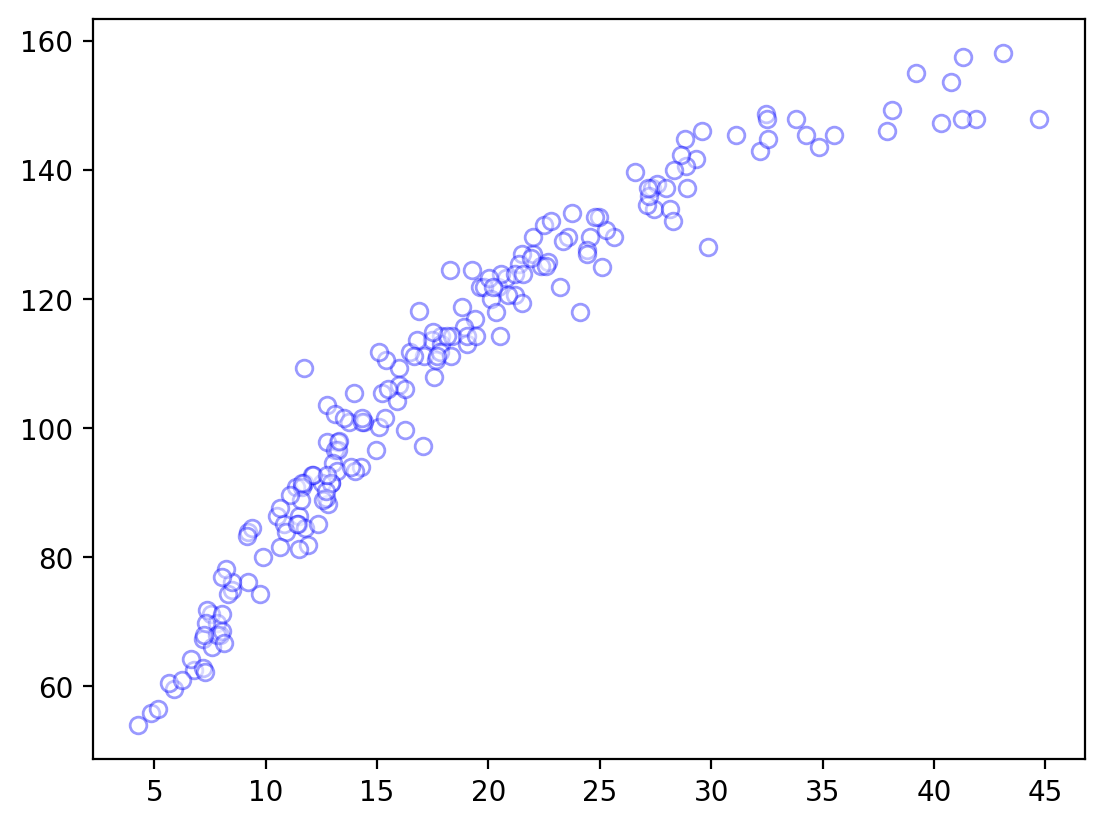

In [1595]:
#We'll plot this again below but this is just to show how it looks
plt.scatter(d2.weight, d2.height, edgecolor = 'blue', facecolor='white', alpha = .4)
plt.plot(weight_seq, mu_mean, color = 'black');
plt.fill_between(weight_seq, mu_hpd[:,0],mu_hpd[:,1], alpha= .2, color='black');
plt.xlabel('weight')
plt.ylabel('height')
plt.xlim(29,65)
plt.ylim(135,180);


#### Figure 4.9

In [ ]:
_, ax = plt.subplots(1,2, figsize = (12, 6))
ax[0].plot(weight_seq, mu_pred, 'o', color = 'blue', alpha = .02);
ax[0].set_xlabel('weight')
ax[0].set_ylabel('height')
ax[0].set_xlim(29,65)
ax[0].set_ylim(135,180);
ax[1].scatter(d2.weight, d2.height, edgecolor = 'blue', facecolor='white', alpha = .4)
ax[1].plot(weight_seq, mu_mean, color = 'black');
ax[1].fill_between(weight_seq, mu_hpd[:,0],mu_hpd[:,1], alpha= .2, color='black');
ax[1].set_xlabel('weight')
ax[1].set_ylabel('height')
ax[1].set_xlim(29,65)
ax[1].set_ylim(135,182);


#### Code 4.58

_This is just describing the link function that we don't even use so I'll skip it for now._

#### Code 4.59

In [ ]:
'''
There's no link function so we just need to take our previous mu_pred matrix and add the sigma values to generate random heights.  
Essentially this is just the likelihood process from our previous model but tailored for the limited range of weights.
'''

sigma_pred = m4_3_trace.posterior['sigma'].sel(chain = 1)
height_pred = np.random.normal(mu_pred, sigma_pred)



#### Code 4.60

In [ ]:
height_pi = az.hdi(height_pred.T, hdi_prob = .89)

#### Code 4.61

In [ ]:
mu_pi = az.hdi(mu_pred.T, hdi_prob = .89);
height_pi = az.hdi(height_pred.T, hdi_prob = .89);
mu_mean = mu_pred.mean(1);

sigma_pred = m4_3_trace.posterior['sigma'].sel(chain = 1)
height_pred = np.random.normal(mu_pred, sigma_pred)


#print(post_pred_mu)
plt.scatter(d2.weight, d2.height, edgecolors = 'blue', facecolors='white', alpha = .3);
plt.plot(weight_seq, mu_mean, color = 'black');
plt.fill_between(weight_seq, mu_pi[:,0], mu_pi[:, 1], color = 'black',alpha= .2);
plt.fill_between(weight_seq, height_pi[:,0], height_pi[:, 1], color = 'black',alpha= .2);

plt.xlim(30,65);
plt.ylim(135,182);



#### Code 4.64

In [1598]:
d = pd.read_csv('Data/Howell1.csv', sep=';')

d.head(10)

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0
5,163.830,62.992589,35.0,1
6,149.225,38.243476,32.0,0
7,168.910,55.479971,27.0,1
8,147.955,34.869885,19.0,0
9,165.100,54.487739,54.0,1


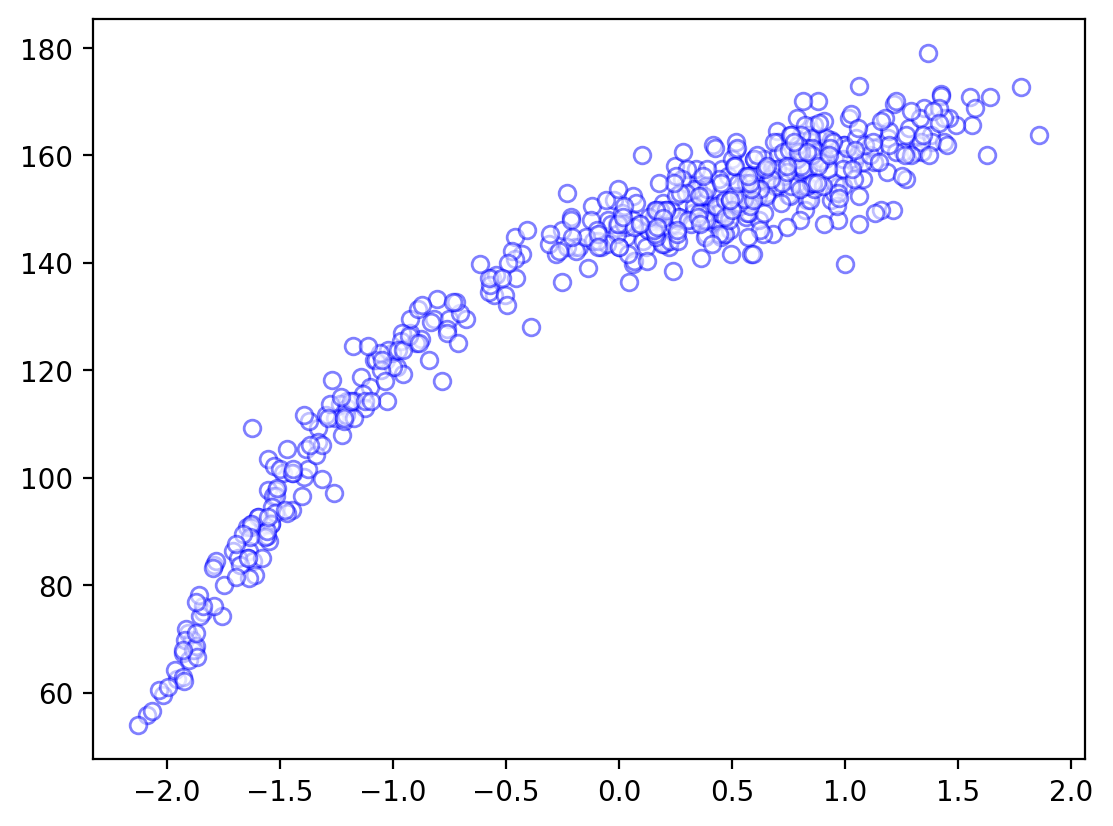

In [1599]:
plt.scatter((d.weight - d.weight.mean())/d.weight.std(), d.height, edgecolors='blue', facecolors='white', alpha=.5);

#### Code 4.65

In [1600]:
d.weight_std = (d.weight - d.weight.mean()) / d.weight.std();
d.weight_std2 = d.weight_std**2;

/var/folders/v0/f2hcx8fs7_z5zrx8d8tr410r0000gn/T/ipykernel_1115/414861023.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.weight_std = (d.weight - d.weight.mean()) / d.weight.std();
/var/folders/v0/f2hcx8fs7_z5zrx8d8tr410r0000gn/T/ipykernel_1115/414861023.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.weight_std2 = d.weight_std**2;


In [1601]:

with pm.Model() as m4_5:
    s = pm.Uniform('s', 0,50)
    b_2 = pm.Normal('b_2', mu=0, sigma=1)
    b_1 = pm.LogNormal('b_1', mu=0, sigma=1)
    a = pm.Normal('a', mu=178, sigma = 20)
    mu = pm.Deterministic('mu', a + (b_1 * d.weight_std) + (b_2 * d.weight_std2))
    height = pm.Normal('height', mu = mu, sigma = s, observed = d.height)
    m4_5_trace = pm.sample(1000)
    m4_5_df = m4_5_trace.posterior.to_dataframe().reset_index()
    m4_5_posterior = pm.sample_posterior_predictive(m4_5_trace)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, b_2, b_1, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Sampling: [height]


#### Code 4.66

In [1602]:
precis(m4_5_df[['a','b_1','b_2','s']])

'Rows: 2176000, Columns: 4'

,mean,sd,5.5%,94.5%
a,146.05,0.37,145.46,146.64
b_1,21.74,0.29,21.28,22.20
b_2,-7.80,0.27,-8.23,-7.36
s,5.80,0.18,5.52,6.09


#### Code 4.67

/var/folders/v0/f2hcx8fs7_z5zrx8d8tr410r0000gn/T/ipykernel_1115/762761616.py:10: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  height_hpd = az.hdi(height_pred, hdi_prob=.89)[idx]


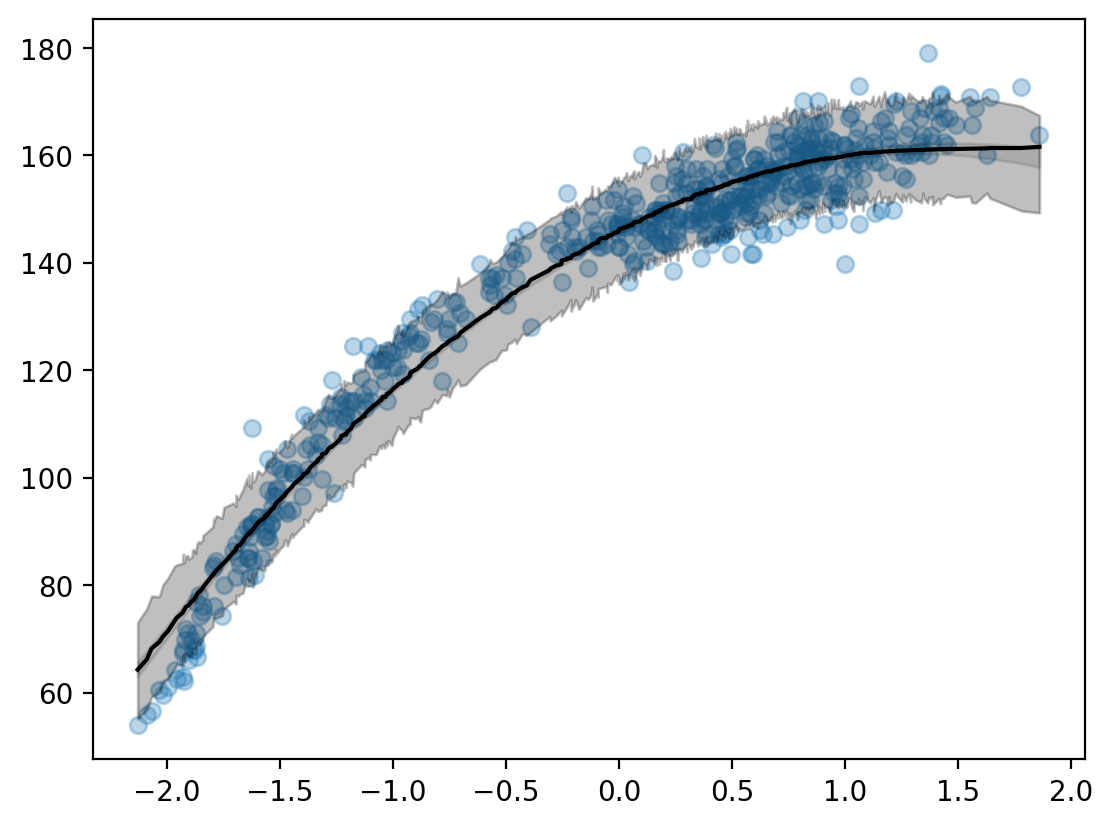

In [ ]:
mu_pred = m4_5_trace.posterior['mu'].values
idx = np.argsort(d.weight_std)
mu_hpd = az.hdi(mu_pred, hdi_prob=.89)[idx]
mu_mean = mu_pred.mean(1)


height_pred = m4_5_posterior.posterior_predictive['height'].sel(chain = 1).values

height_hpd = az.hdi(height_pred, hdi_prob=.89)[idx]
height_mean = np.sort(height_pred.mean(0))

plt.scatter(d.weight_std, d.height, c='C0', alpha=0.3);
plt.plot(d.weight_std[idx], height_mean, color='black')
plt.fill_between(d.weight_std[idx], mu_hpd[:,0], mu_hpd[:,1], color='black', alpha = .1, );
plt.fill_between(d.weight_std[idx], height_hpd[:,0], height_hpd[:,1], color='black', alpha=0.25);



### Code 4.69

In [1685]:
d.weight_std3 = d.weight_std ** 3
with pm.Model() as m4_6:
    s = pm.Uniform('s', 0,50)
    b_1 = pm.LogNormal('b_1', mu=0, sigma=1)
    b_2 = pm.Normal('b_2', mu=0, sigma=1)
    b_3 = pm.Normal('b_3', mu=0, sigma=1)
    a = pm.Normal('a', mu=178, sigma = 20)
    mu = pm.Deterministic('mu', a + (b_1 * d.weight_std) + (b_2 * d.weight_std2)+ (b_3 * d.weight_std3))
    height = pm.Normal('height', mu = mu, sigma = s, observed = d.height)
    m4_6_trace = pm.sample(1000)
    m4_6_df = m4_6_trace.posterior.to_dataframe().reset_index()
    m4_6_posterior = pm.sample_posterior_predictive(m4_6_trace)


mu_pred = m4_6_trace.posterior['mu'].values
idx = np.argsort(d.weight_std)
mu_hpd = az.hdi(mu_pred, hdi_prob=.89)[idx]
mu_mean = mu_pred.mean(1)



height_pred = m4_6_posterior.posterior_predictive.height.flatten().values


height_hpd = az.hdi(height_pred, hdi_prob=.89)[idx]
height_mean = np.sort(height_pred.mean(0))

plt.scatter(d.weight_std, d.height, c='C0', alpha=0.3);
plt.plot(d.weight_std[idx], height_mean, color='black');
plt.fill_between(d.weight_std[idx], mu_hpd[:,0], mu_hpd[:,1], color='black', alpha = .1, );
plt.fill_between(d.weight_std[idx], height_hpd[:,0], height_hpd[:,1], color='black', alpha=0.25);


/var/folders/v0/f2hcx8fs7_z5zrx8d8tr410r0000gn/T/ipykernel_1115/2143583044.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.weight_std3 = d.weight_std ** 3
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, b_1, b_2, b_3, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Sampling: [height]


AttributeError: 'DataArray' object has no attribute 'flatten'

#### Code 4.72

In [ ]:
d = pd.read_csv('Data/cherryblossoms.csv', sep=";")

precis(d)

#### Code 4.73

In [ ]:
blossom_data = d[d.notna().all(axis=1)]
num_knots = 15
knot_list = pd.qcut(d2.year, q=num_knots)

In [ ]:
blossom_data.head(n=10)

blossom_data.plot.scatter(
    "year", "doy", color="cornflowerblue", s=10, title="Cherry Blossom Data", ylabel="Days in bloom"
);

num_knots = 15
knot_list = np.quantile(blossom_data.year, np.linspace(0, 1, num_knots))
knot_list

blossom_data.plot.scatter(
    "year", "doy", color="cornflowerblue", s=10, title="Cherry Blossom Data", ylabel="Day of Year"
)
for knot in knot_list:
    plt.gca().axvline(knot, color="grey", alpha=0.4);

In [ ]:
B = dmatrix(
    "bs(year, knots=knots, degree=3, include_intercept=True) - 1",
    {"year": blossom_data.year.values, "knots": knot_list[1:-1]},
)
B

In [ ]:
spline_df = (
    pd.DataFrame(B)
    .assign(year=blossom_data.year.values)
    .melt("year", var_name="spline_i", value_name="value")
)

color = plt.cm.magma(np.linspace(0, 0.80, len(spline_df.spline_i.unique())))

fig = plt.figure()
for i, c in enumerate(color):
    subset = spline_df.query(f"spline_i == {i}")
    subset.plot("year", "value", c=c, ax=plt.gca(), label=i)
plt.legend(title="Spline Index", loc="upper center", fontsize=8, ncol=6);

#### Code 4.74

In [ ]:
from patsy import dmatrix
knots = knot_list[1:-1]

# Convert the intervals to numeric values (extracting the midpoints or upper bounds)
knots_numeric = [knot.right for knot in knots]  # You can use .right or .left, depending on your needs

# Create the formula for B-spline basis matrix
degree = 3  # Degree of the spline
intercept = True  # Include intercept
formula = f"bs(year, knots={knots_numeric}, degree={degree}, include_intercept={intercept})"

# Generate the B-spline basis matrix
B = dmatrix(formula, data=d2, return_type='dataframe')

display(B.shape)

In [ ]:
#https://github.com/pymc-devs/pymc-examples/blob/main/examples/howto/spline.ipynb

#### C3E1

**Question**: 

In the model definition below, which line is the likelihood?

$
y_i \sim \text{Normal}(\mu, \sigma)
$

$
\mu \sim \text{Normal}(0, 10)
$

$
\sigma \sim \text{Exponential}(1)
$

---
<details>
<summary>Answer</summary>

$
y_i \sim \text{Normal}(\mu, \sigma)
$

</details>

---
#### C3E2

**Question**: 

In the model definition just above, how many parameters are in the posterior distribution?

---
<details>
<summary>Answer</summary>

$
\mu \sim \text{Normal}(0, 10)
$

$
\sigma \sim \text{Exponential}(1)
$

They are parameters because they are both probabilistic and also used to specify priors. $ y_i \sim Normal(\mu, \sigma) $ is not a parameter because it is what is being estimated, not what we are using to estimate. Remember that parameters are essentially _inputs_ (like $\mu$ and $\sigma$ ), and in this specification $y_i$ is more like an _output_
</details>

---
#### C3E3

**Question**: 

Using the model definition above, write down the appropriate form of Bayes’ theorem that includes the proper likelihood and priors.

---
<details>
<summary>Answer</summary>

$
P(\mu, \sigma| y_i) = \frac{\Pi_i Normal(y_i|\mu, \sigma) Normal(\mu | 0, 10) Normal(\sigma|0,10)}
{\Pi_i \int \int Normal(y_i|\mu, \sigma) Normal(\mu | 0, 10) Normal(\sigma|0,10)d\mu d\sigma}
$

The full breakdown of this is found in the Overthinking box starting on pg. 86

</details>

---
#### C3E4

**Question**: 

In the model definition below, which line is the linear model?

$
y_i \sim \text{Normal}(\mu, \sigma)
$

$
\mu_i = \alpha + \beta \chi_i
$

$
\alpha \sim \text{Normal}(0,10)
$

$
\beta \sim \text{Normal}(0,1)
$

$
\sigma \sim \text{Exponential}(2)
$

---
<details>
<summary>Answer</summary>

$
\mu_i = \alpha + \beta \chi_i
$

It's the linear model since its deterministic and the contains both the intercept ($\alpha$ value) and coefficient ($\beta$ value).

</details>

---
#### C3E5

**Question**: 

In the model definition just above, how many parameters are in the posterior distribution?


---
<details>
<summary>Answer</summary>

Similar to question E2, everything but the $y_i$ and $mu_i$ are parameters:
- $\mu_i$ is the linear regression and since it is deterministic cannot be a parameter.
- $y_i$ like the above questions is the object to be estimated and thus is not a parameter

</details>

---
#### C3M1

**Question**: 

For the model definition below, simulate observed y values from the prior (not the posterior). 

$
y_i \sim Normal(\mu , \sigma)
$

$
\mu \sim  Normal(0, 10) 
$

$
\sigma \sim  Exponential(1)
$

---
<details>
<summary>Answer</summary>

```
with pm.Model() as c3m1:
    sigma = pm.Exponential('sigma', 1)
    mu = pm.Normal('mu', mu = 0, sigma= 10)
    y = pm.Normal('y', mu = mu, sigma = sigma)
    prior_sims = pm.sample_prior_predictive(1000)
```

The above code will generate values of y within the prior_sims variable.  Which we can observe in the inferencedata object or plot using the following code:

```
y_prior_predictions = prior_sims.prior.y.values

az.plot_kde(y_prior_predictions, bw = 1.5)
```

</details>

---
#### C3M2

**Question**: 

For the model definition below, translate the model just above into a quap (or pymc) formula. 

$
y_i \sim Normal(\mu , \sigma)
$

$
\mu \sim  Normal(0, 10) 
$

$
\sigma \sim  Exponential(1)
$

---
<details>
<summary>Answer</summary>

```
with pm.Model() as c3m2:
    sigma = pm.Exponential('sigma', 1)
    mu = pm.Normal('mu', mu = 0, sigma= 10)
    y = pm.Normal('y', mu = mu, sigma = sigma, observed = observed)
    trace = pm.sample(100)
```

</details>

---
#### C3M3

**Question**: 

Translate the quap model formula below into a mathematical model definition.

```
flist <- alist(
    y ~ dnorm( mu , sigma ),
    mu <- a + b*x,
    a ~ dnorm( 0 , 10 ),
    b ~ dunif( 0 , 1 ),
    sigma ~ dexp( 1 )
)
```

---
<details>
<summary>Answer</summary>


$
y_i \sim Normal(\mu, \sigma)
$

$
\mu_i = \alpha + \beta x_i
$

$
\alpha \sim Normal(0, 10)
$

$
\beta \sim Uniform(0,1)
$

$
\sigma \sim Exponential(1)
$

</details>

---
#### C3M4

**Question**: 

A sample of students is measured for height each year for 3 years.  After the third year, you want to fit a linear regression predicting height using year as a predictor. Write down the mathematical model definition for this regression, using any variable names and priors you choose. Be prepared to defend your choice of priors.

---
<details>
<summary>Answer</summary>

The first step in defining a model will almost always be defining the likelihood.  In this case the likelihood is best described as a normal distribution for both the reason that if we didn't know any better we should use normal (maximum entropy) but based what we do know about height is that they are normally distributed:

$y_i \sim Normal(\mu, \sigma)$

In our likelihood our $\mu$ is defined by our linear model.  So to fit it we'll define our linear model as:

$\mu_i = \alpha + \beta \chi_i$

Now we need to define our parameters in our linear model $\alpha$ and $\beta$.

Our $\alpha$ controls where most of the lines will cross the Y axis.  In this context this will be $Normal$ distribtuion. It may be tempting to assume we should use a much lower starting $\mu$ in our prior since the word "students" is used. But that information may be misleading since we don't know what age the students are.  College students will be notably taller than grade school.  Instead of lowering the mean value of $\alpha$ it's probably better to increase the "uncertainty" by raising the $\sigma$ values in the prior. I think it's safe to say the school age population will "likley" be smaller but it's not a guarantee.  Something this would make sense:

$\alpha \sim Normal(130, 50)

Our $\beta$ value will control the slope of the line. I think in this scenario it is safe to assume the line should slope upward since we know scientifically this is how height works in human populations.  In this case we'll use our $LogNormal$ to achieve this affect. Within the $LogNormal$ we have two parameters.  The $\mu$ will control the severity of the slope.  So a $\mu$ of 5 will have very steep climbs.  While the $\sigma$ will control the variety of how steep the climbs are.  Again our uncertainty would lead us to believe we should have a modest steep-ness but with lots of variety to reflect our uncertainty of the school age population (grade school will grow faster than college)

For $\beta$ I would choose something like a $LogNormal(0,.5)$

Our $\sigma$ will control the overall uncertainty in the whole system. In other words, if you have 5 people that have the same "independent" variable (let's say weight), how varied should the dependent variable (height) be?   What we do know is our sigma has to be a positive number so we'll stick to our Exponential from before.  his is a bit of plug and play but we've already incorporated a lot of uncertainty into our other parameters so a smaller $\sigma$ makes sense here.  

For $\sigma$ I would choose something like a $Exponential(1)$

```
with pm.Model() as model:
    sigma = pm.Exponential('sigma', 1)
    a = pm.Normal('a', mu = 120, sigma = 45)
    b = pm.LogNormal('b', mu = .0, sigma = .5)
    mu = pm.Deterministic('mu', a + b * x)
    y = pm.Normal('y', mu = mu, sigma = sigma)
    priors = pm.sample_prior_predictive(50)
```

We can then play around with how the prior predictions look by using the following code:

```

a_samples = priors.prior.a.sel(chain = 0).values
print(a_samples.shape)
b_samples = priors.prior.b.sel(chain = 0).values
x = np.linspace(0, 200 , 50)
x_mean = x_obs.mean()
for i in range(50): 
    a_sample = a_samples[i]
    b_sample = b_samples[i]
    plt.plot(x, a_sample + b_sample * (x - x_mean), color="blue", alpha=0.2)
    plt.xlim(0,200)
    plt.ylim(0,400)

```

</details>

---
#### C3M4

**Question**: 

Now suppose I remind you that every student got taller each year. Does this information lead you to change your choice of priors? How?

---
<details>
<summary>Answer</summary>

Largely we've already accounted for this in using a $LogNormal$ $\beta$ value which ensures that our slopes move positively. Additionally you could use a different adjustment based on year.  Something like:

$\alpha_1$ and $\alpha_2$ to signify different starting postitions for the "mean" value.   

</details>

---
#### C3M4

**Question**: 

Now suppose I tell you that the variance among heights for students of the same age is never more than 64cm. How does this lead you to revise your priors?

---
<details>
<summary>Answer</summary>

This is a perfect datum for our $\sigma$ value.  It controls how much variance there is among samples with the same age.  Since the variance is the square of the variance, we know that a $\sigma$ that is $Normal(0,8)$ will account for all the variance among our population.
</details>

---
#### C3H1

**Question**: 

The weights listed below were recorded in the !Kung census, but heights were not recorded for these individuals. Provide predicted heights and 89% intervals (either HPDI or PI) for each of these individuals. That is, fill in the table below, using model-based predictions.

|Individual | weight | expected height | 89% interval |
|-----------|--------|-----------------|--------------|
|      |     46.95   |       |          |
|      |    43.72   |       |          |
|      |    64.78   |       |          |
|      |    32.59    |       |          |
|      |   54.63    |       |          |


---
<details>
<summary>Answer</summary>

```
weights = [46.95, 43.72, 64.78, 32.59, 54.63]

data = pd.read_csv('Data/Howell1.csv', sep = ';')

weight = data.weight
weight_bar = data.weight.mean()

with pm.Model() as mm:
    sigma = pm.Uniform('sigma', 0,50)
    a = pm.Normal('a', mu = 178, sigma = 20)
    b = pm.LogNormal('b', mu = 0, sigma = 1)
    mu = pm.Deterministic('mu', a + b * (weight - weight_bar))

    height = pm.Normal('height', mu = mu, sigma = sigma, observed=data.height)

    mm_trace = pm.sample(1000)

b_traces = mm_trace.posterior.b.values.flatten()
a_traces = mm_trace.posterior.a.values.flatten()

for weight in weights:
    expected_height = a_traces + b_traces * (weight - weight_bar)
    hdi = az.hdi(expected_height, hdi_prob = .89)
    height_means = expected_height.mean()
    print(height_means, hdi)
```


|Individual | weight | expected height | 89% interval |
|-----------|--------|-----------------|--------------|
|      |     46.95   |        158.27         |      [157.47986338, 159.05552316]      |
|      |    43.72    |        152.58        |      [151.83185881, 153.26202119]        |
|      |    64.78     |      189.72          |      [188.30530957, 191.09907457]        |
|      |    32.59     |         132.95       |      [132.26684774, 133.59317766]        |
|      |   54.63     |          171.82       |      [170.82185826, 172.84939729]         |

</details>

---
#### C3H2

**Question**: 

Select out all the rows in the Howell1 data with ages below 18 years of age. If you do it right, you should end up with a new data frame with 192 rows in it.

(a) Fit a linear regression to these data, using quap. Present and interpret the estimates. For every 10 units of increase in weight, how much taller does the model predict a child gets?

(b) Plot the raw data, with height on the vertical axis and weight on the horizontal axis. Super- impose the MAP regression line and 89% interval for the mean. Also superimpose the 89% interval for predicted heights.

(c) What aspects of the model fit concern you? Describe the kinds of assumptions you would change, if any, to improve the model. You don’t have to write any new code. Just explain what the model appears to be doing a bad job of, and what you hypothesize would be a better model.

---
<details>
<summary>Answer</summary>

#### A.)

The value that determines "for every 10 units of increase in weight, how much taller" will be the $\beta$ value (mulitplied by 10) in our model.  In this example our model is:
```
data = pd.read_csv('Data/Howell1.csv', sep = ';')

d2 = data[data.age < 18]

with pm.Model() as young:
    sigma = pm.Uniform('sigma', 0,60)
    a = pm.Normal('a', mu = 110, sigma = 30)
    b = pm.LogNormal('b', mu = 0, sigma = 1)
    mu = pm.Deterministic('mu', a + b * (d2.weight - d2.weight.mean()))

    height = pm.Normal('height', mu = mu, sigma = sigma, observed=d2.height)

    young_trace = pm.sample(1000)

    young_post_prod = pm.sample_posterior_predictive(young_trace)
    
    young_df = young_trace.posterior.to_dataframe().reset_index()
```

After running our `precis(young_df[['a','b','sigma']])` we discover our beta is 2.71.  So for every 10 units of weight we expect ~27.2 unit change in height

#### B.)

Heres the simple way to graph the rest of the data needed

```
weight_sort = np.sort(d2.weight)

mu_pred = young_trace.posterior['mu'].values
mu_hpd = az.hdi(mu_pred, hdi_prob=.89)[idx]
mu_mean = mu_pred.mean(1)


height_pred = young_post_prod.posterior_predictive['height'].sel(chain = 1).values

height_hpd = az.hdi(height_pred, hdi_prob=.89)[idx]
height_mean = np.sort(height_pred.mean(0))

plt.scatter(d2.weight, d2.height, c='C0', alpha=0.3);
plt.plot(weight_sort, height_mean, color='black')
plt.fill_between(weight_sort, mu_hpd[:,0], mu_hpd[:,1], color='grey', alpha = .1, );
plt.fill_between(weight_sort, height_hpd[:,0], height_hpd[:,1], color='grey', alpha=0.25);


# Add labels and legend
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Younger Howell Data")
plt.legend()
plt.show()
```

#### C.)

Immediately what jumps out is the "tail ends" of these distributions are problematic. The growth is rapid early then reasonably tails off as the subjects get older.  So judging them all on the same regression is causing issues both for the younger samples (underestimates their growth rate) and older (overestimates their growth).  

In this situation a spline could work well.  There seem like 3 developmental phases that we could patch together with different splines to more accurately model the various growth rates related to development. 


</details>

---
#### C3H3

**Question**: 

Suppose a colleague of yours, who works on allometry, glances at the practice problems just above. Your colleague exclaims, “That’s silly. Everyone knows that it’s only the logarithm of body weight that scales with height!” Let’s take your colleague’s advice and see what happens.

(a)
Model the relationship between height (cm) and the natural logarithm of weight (log-kg). Use the entire Howell1 data frame, all 544 rows, adults and non-adults. Fit this model, using quadratic approximation:

$
h_i \sim Normal(\mu_i, \sigma)
$

$
u_i = \alpha + \beta log(w_i)
$

$
\alpha \sim Normal(178,20)
$

$
\beta \sim LogNormal(0,1)
$

$
\sigma \sim Uniform(0,50)
$

(b)
begin with this plot:

`plt.plot(data.height, data.weight)`

Then use samples from the quadratic approximate posterior of the model in (a) to superimpose on the plot: 

(1) the predicted mean height as a function of weight, 

(2) the 97% interval for the mean, and 

(3) the 97% interval for predicted heights.

---
<details>
<summary>Answer</summary>


```
data = pd.read_csv('Data/Howell1.csv', sep = ';')


with pm.Model() as log_model:
    sigma = pm.Uniform('s', 0,50)
    alpha = pm.Normal('a', mu = 178, sigma = 20)
    beta  = pm.LogNormal('b', mu = 0, sigma = 1)
    mu    = pm.Deterministic('mu', alpha + beta * pm.math.log(data.weight))

    height = pm.Normal('height', mu = mu, sigma =  sigma, observed = data.height)

    log_model_trace = pm.sample(1000)

    log_model_posterior = pm.sample_posterior_predictive(log_model_trace)


weights_sort_idx = np.argsort(data.weight)
weights_sort = np.sort(data.weight)

# Extract mu predictions
mu_pred = log_model_trace.posterior.mu.sel(chain=1).values
mu_mean = mu_pred.mean(axis=0)  # Mean across all posterior samples
mu_hpd = az.hdi(mu_pred, hdi_prob=0.97)  # HDI for mu predictions

# Extract height predictions
height_pred = log_model_posterior.posterior_predictive.height.sel(chain=1).values
height_mean = height_pred.mean(axis=0)  # Mean across all posterior samples
height_hpd = az.hdi(height_pred, hdi_prob=0.97)  # HDI for height predictions

# Plot observed data
plt.scatter(data.weight, data.height, c="C0", alpha=0.3, label="Observed Data")

# Plot mean prediction line for heights
plt.plot(weights_sort, height_mean[weights_sort_idx], color="black", label="Mean Prediction")

# Fill 97% HDI for mu
plt.fill_between(
    weights_sort,
    mu_hpd[:, 0][weights_sort_idx],
    mu_hpd[:, 1][weights_sort_idx],
    color="grey",
    alpha=0.5,
)

# Fill 97% HDI for heights
plt.fill_between(
    weights_sort,
    height_hpd[:, 0][weights_sort_idx],
    height_hpd[:, 1][weights_sort_idx],
    color="grey",
    alpha=0.3,
)

# Add labels and legend
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Log Data")
plt.legend()
plt.show()
```

</details>

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, a, b]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
Sampling: [height]


/var/folders/v0/f2hcx8fs7_z5zrx8d8tr410r0000gn/T/ipykernel_1115/181090661.py:23: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  mu_hpd = az.hdi(mu_pred, hdi_prob=0.97)  # HDI for mu predictions
/var/folders/v0/f2hcx8fs7_z5zrx8d8tr410r0000gn/T/ipykernel_1115/181090661.py:28: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  height_hpd = az.hdi(height_pred, hdi_prob=0.97)  # HDI for height predictions


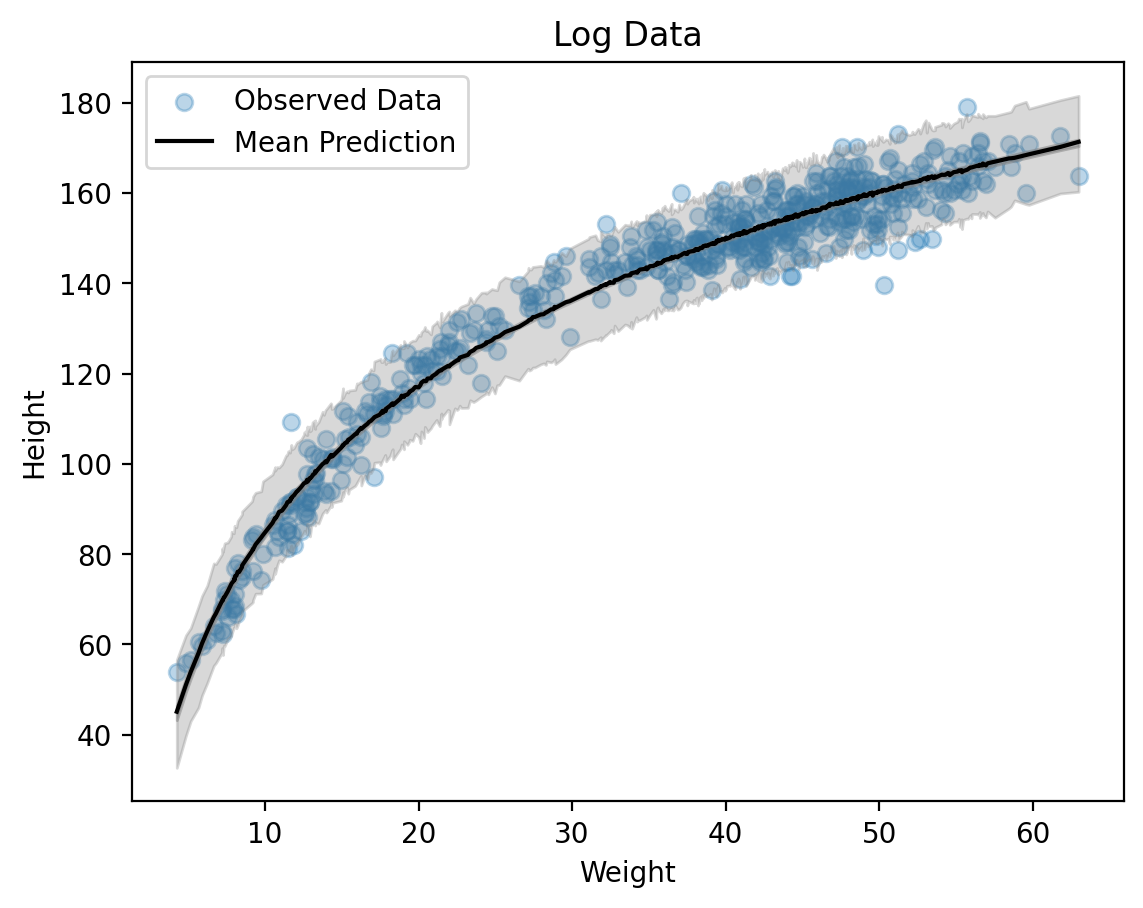

In [1706]:
data = pd.read_csv('Data/Howell1.csv', sep = ';')


with pm.Model() as log_model:
    sigma = pm.Uniform('s', 0,50)
    alpha = pm.Normal('a', mu = 178, sigma = 20)
    beta  = pm.LogNormal('b', mu = 0, sigma = 1)
    mu    = pm.Deterministic('mu', alpha + beta * pm.math.log(data.weight))

    height = pm.Normal('height', mu = mu, sigma =  sigma, observed = data.height)

    log_model_trace = pm.sample(1000)

    log_model_posterior = pm.sample_posterior_predictive(log_model_trace)


weights_sort_idx = np.argsort(data.weight)
weights_sort = np.sort(data.weight)

# Extract mu predictions
mu_pred = log_model_trace.posterior.mu.sel(chain=1).values
mu_mean = mu_pred.mean(axis=0)  # Mean across all posterior samples
mu_hpd = az.hdi(mu_pred, hdi_prob=0.97)  # HDI for mu predictions

# Extract height predictions
height_pred = log_model_posterior.posterior_predictive.height.sel(chain=1).values
height_mean = height_pred.mean(axis=0)  # Mean across all posterior samples
height_hpd = az.hdi(height_pred, hdi_prob=0.97)  # HDI for height predictions

# Plot observed data
plt.scatter(data.weight, data.height, c="C0", alpha=0.3, label="Observed Data")

# Plot mean prediction line for heights
plt.plot(weights_sort, height_mean[weights_sort_idx], color="black", label="Mean Prediction")

# Fill 97% HDI for mu
plt.fill_between(
    weights_sort,
    mu_hpd[:, 0][weights_sort_idx],
    mu_hpd[:, 1][weights_sort_idx],
    color="grey",
    alpha=0.5,
)

# Fill 97% HDI for heights
plt.fill_between(
    weights_sort,
    height_hpd[:, 0][weights_sort_idx],
    height_hpd[:, 1][weights_sort_idx],
    color="grey",
    alpha=0.3,
)

# Add labels and legend
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Log Data")
plt.legend()
plt.show()


/var/folders/v0/f2hcx8fs7_z5zrx8d8tr410r0000gn/T/ipykernel_1115/2846516342.py:7: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  mu_hpd = az.hdi(mu_pred, hdi_prob=0.97)  # HDI for mu predictions
/var/folders/v0/f2hcx8fs7_z5zrx8d8tr410r0000gn/T/ipykernel_1115/2846516342.py:12: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  height_hpd = az.hdi(height_pred, hdi_prob=0.97)  # HDI for height predictions


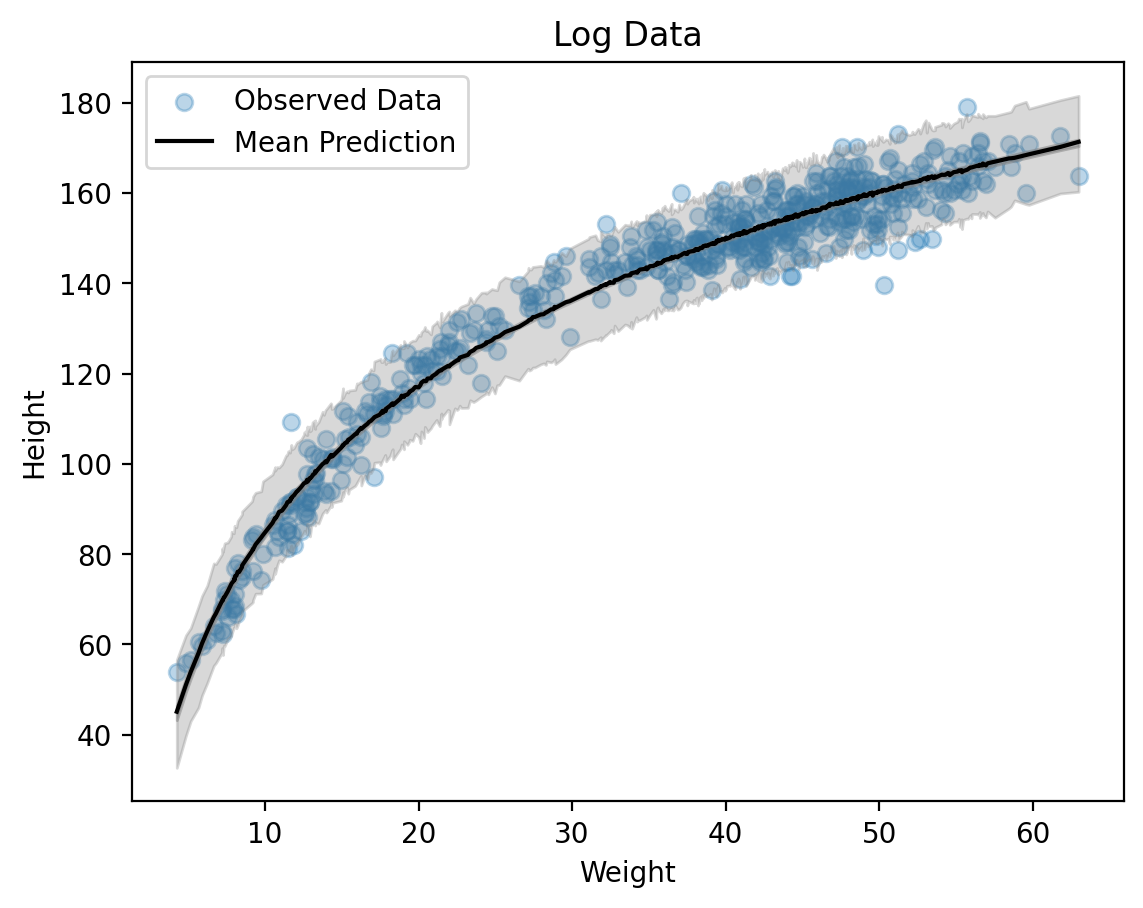

In [1707]:
weights_sort_idx = np.argsort(data.weight)
weights_sort = np.sort(data.weight)

# Extract mu predictions
mu_pred = log_model_trace.posterior.mu.sel(chain=1).values
mu_mean = mu_pred.mean(axis=0)  # Mean across all posterior samples
mu_hpd = az.hdi(mu_pred, hdi_prob=0.97)  # HDI for mu predictions

# Extract height predictions
height_pred = log_model_posterior.posterior_predictive.height.sel(chain=1).values
height_mean = height_pred.mean(axis=0)  # Mean across all posterior samples
height_hpd = az.hdi(height_pred, hdi_prob=0.97)  # HDI for height predictions

# Plot observed data
plt.scatter(data.weight, data.height, c="C0", alpha=0.3, label="Observed Data")

# Plot mean prediction line for heights
plt.plot(weights_sort, height_mean[weights_sort_idx], color="black", label="Mean Prediction")

# Fill 97% HDI for mu
plt.fill_between(
    weights_sort,
    mu_hpd[:, 0][weights_sort_idx],
    mu_hpd[:, 1][weights_sort_idx],
    color="grey",
    alpha=0.5,
)

# Fill 97% HDI for heights
plt.fill_between(
    weights_sort,
    height_hpd[:, 0][weights_sort_idx],
    height_hpd[:, 1][weights_sort_idx],
    color="grey",
    alpha=0.3,
)

# Add labels and legend
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Log Data")
plt.legend()
plt.show()

---
#### C3H34

**Question**: 

 Plot the prior predictive distribution for the polynomial regression model in the chapter. You can modify the code that plots the linear regression prior predictive distribution. Can you modify the prior distributions of $\alpha$, $\beta_1$ and $\beta_2$ so that the prior predictions stay within the biologically reasonable outcome space? That is to say: Do not try to fit the data by hand. But do try to keep the curves consistent with what you know about height and weight, before seeing these exact data.

---
<details>
<summary>Answer</summary>

```
with pm.Model() as m4_5:
    s = pm.Uniform('s', 0,80)
    b_2 = pm.Normal('b_2', mu=2, sigma=.65)
    b_1 = pm.LogNormal('b_1', mu=0, sigma=.65)
    a = pm.Normal('a', mu=120, sigma = 45)
    mu = pm.Deterministic('mu', a + (b_1 * d.weight_std) + (b_2 * d.weight_std2))
    height = pm.Normal('height', mu = mu, sigma = s, observed = d.height)
    prior = pm.sample_prior_predictive(1000)


s1_range = np.linspace(d.weight_std.min(),d.weight_std.max(), 1000)
s2_range = np.linspace(d.weight_std2.min(),d.weight_std2.max(), 1000)

prior_df = prior.prior[['s','b_1','b_2','a']].to_dataframe().reset_index()

for _, column in prior_df.sample(50).iterrows():
    mu_priors = column.a + (column.b_1 * s1_range) + (column.b_2 * s2_range)
    plt.plot(s1_range, mu_priors, color='cornflowerblue')

plt.hlines(272,-2,2,label='Tallest Man', color = 'red', linestyles="dashed")
plt.text( x=-1.5, y = 255, s="World's tallest person (272cm)", color='black')

plt.hlines(0,-2,2,label='Embryo', color = 'red', linestyles="dashed")
plt.text( x=-1.5, y = 10, s="Embryo", color='black')

plt.xlim(-2,2)
```

</details>

Sampling: [a, b_1, b_2, height, s]


Sampling: [a, b_1, b_2, height, s]


(-2.0, 2.0)

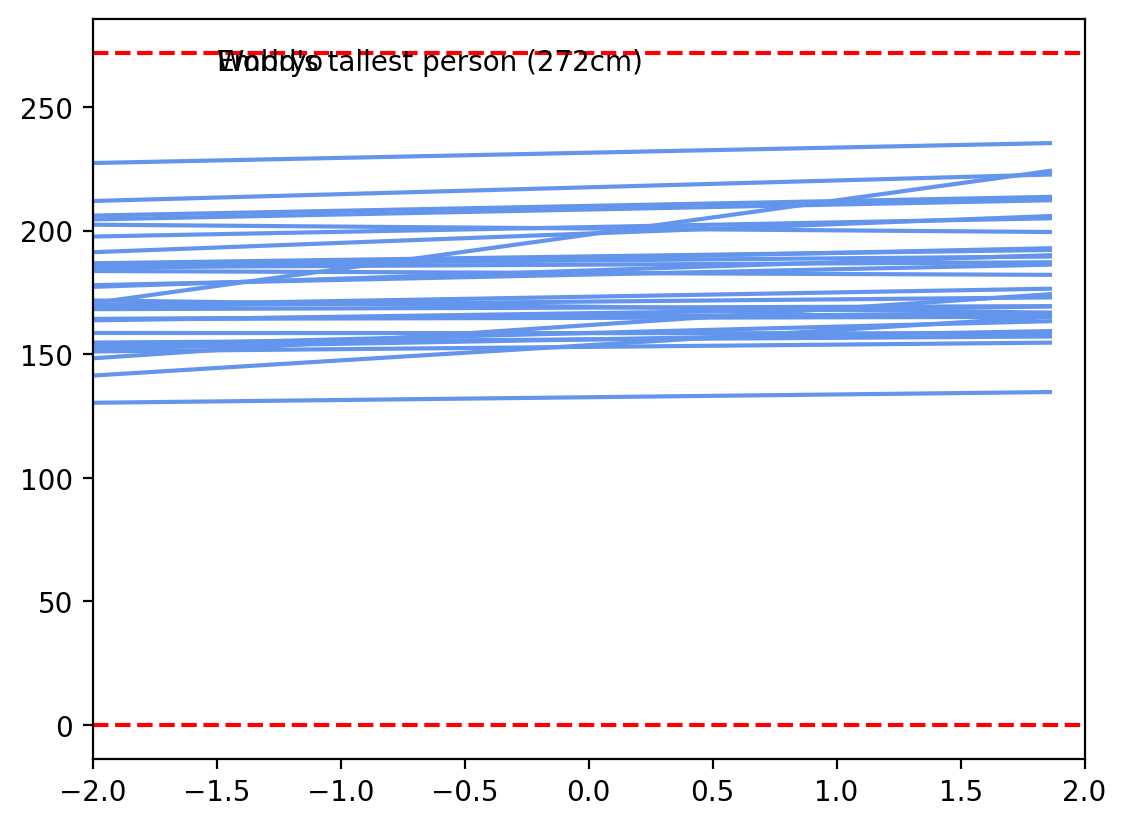

In [1743]:
with pm.Model() as m4_5:
    s = pm.Uniform('s', 0,50)
    b_2 = pm.Normal('b_2', mu=0, sigma=1)
    b_1 = pm.LogNormal('b_1', mu=0, sigma=1)
    a = pm.Normal('a', mu=178, sigma = 20)
    mu = pm.Deterministic('mu', a + (b_1 * d.weight_std) + (b_2 * d.weight_std2))
    height = pm.Normal('height', mu = mu, sigma = s, observed = d.height)
    prior = pm.sample_prior_predictive(1000)


s1_range = np.linspace(d.weight_std.min(),d.weight_std.max(), 1000)
s2_range = np.linspace(d.weight_std2.min(),d.weight_std2.max(), 1000)

prior_df = prior.prior[['s','b_1','b_2','a']].to_dataframe().reset_index()

for _, column in prior_df.sample(30).iterrows():
    mu_priors = column.a + (column.b_1 * s1_range) + (column.b_2 * s2_range)
    plt.plot(s1_range, mu_priors, color='cornflowerblue')

plt.hlines(272,-2,2,label='Tallest Man', color = 'red', linestyles="dashed")
plt.text( x=-1.5, y = 265, s="World's tallest person (272cm)", color='black')

plt.hlines(0,-2,2,label='Embryo', color = 'red', linestyles="dashed")
plt.text( x=-1.5, y = 265, s="Embryo", color='black')

plt.xlim(-2,2)

Sampling: [a, b_1, b_2, height, s]


(-2.0, 2.0)

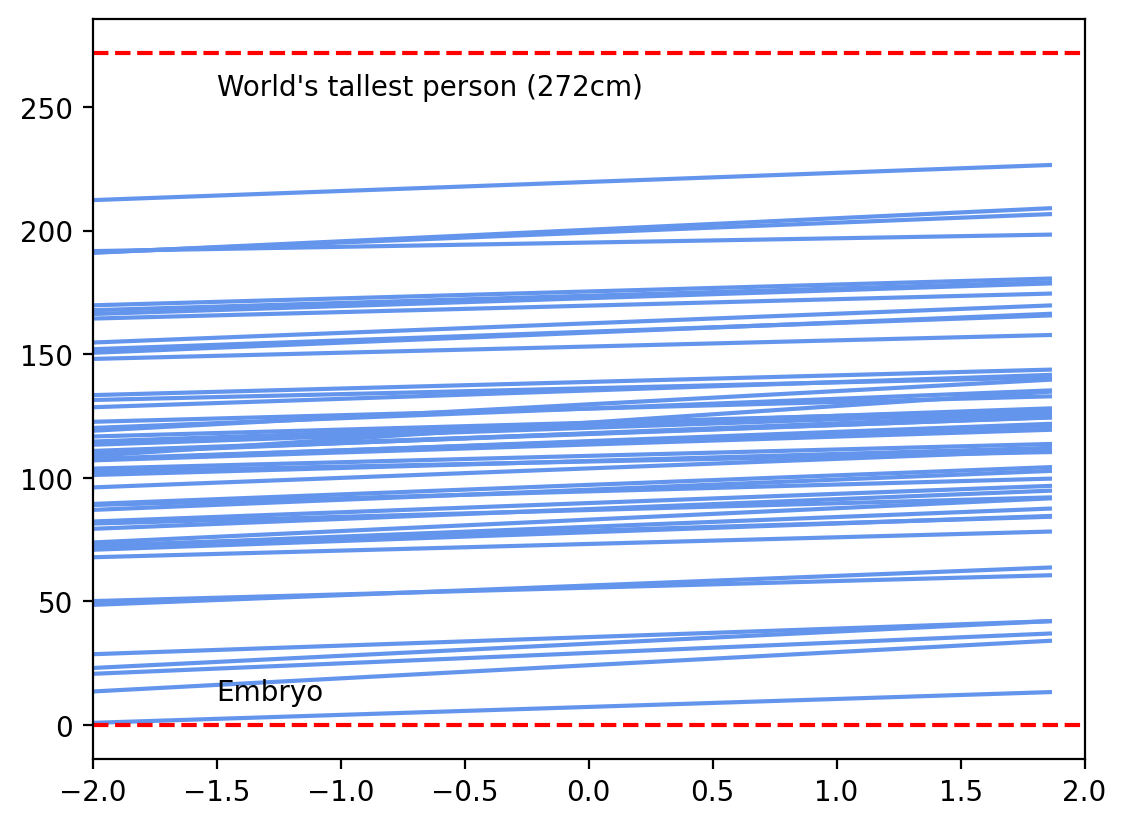

In [1771]:
with pm.Model() as m4_5:
    s = pm.Uniform('s', 0,80)
    b_2 = pm.Normal('b_2', mu=2, sigma=.65)
    b_1 = pm.LogNormal('b_1', mu=0, sigma=.65)
    a = pm.Normal('a', mu=120, sigma = 45)
    mu = pm.Deterministic('mu', a + (b_1 * d.weight_std) + (b_2 * d.weight_std2))
    height = pm.Normal('height', mu = mu, sigma = s, observed = d.height)
    prior = pm.sample_prior_predictive(1000)


s1_range = np.linspace(d.weight_std.min(),d.weight_std.max(), 1000)
s2_range = np.linspace(d.weight_std2.min(),d.weight_std2.max(), 1000)

prior_df = prior.prior[['s','b_1','b_2','a']].to_dataframe().reset_index()

for _, column in prior_df.sample(50).iterrows():
    mu_priors = column.a + (column.b_1 * s1_range) + (column.b_2 * s2_range)
    plt.plot(s1_range, mu_priors, color='cornflowerblue')

plt.hlines(272,-2,2,label='Tallest Man', color = 'red', linestyles="dashed")
plt.text( x=-1.5, y = 255, s="World's tallest person (272cm)", color='black')

plt.hlines(0,-2,2,label='Embryo', color = 'red', linestyles="dashed")
plt.text( x=-1.5, y = 10, s="Embryo", color='black')

plt.xlim(-2,2)